# HM1: Logistic Regression.

### Name: Amena Akbary


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# for my models
from sklearn.linear_model import LogisticRegression
# for optimization
import scipy.optimize as opt
# for plotting
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
# !pip install ucimlrepo

# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# # data (as pandas dataframes)
# X = breast_cancer_wisconsin_diagnostic.data.features
# y = breast_cancer_wisconsin_diagnostic.data.targets

# # metadata
# print(breast_cancer_wisconsin_diagnostic.metadata)

# # variable information
# print(breast_cancer_wisconsin_diagnostic.variables)

file_path = "/content/data.csv"
df = pd.read_csv(file_path)

df['diagnosis'].replace({'B': 1, 'M': -1}, inplace = True)

X = df.drop(["diagnosis", 'Unnamed: 32', 'id'], axis = 1).to_numpy()
y = df["diagnosis"].to_numpy()

X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant).
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

# transform target labels
# label_encoder = LabelEncoder() # function would convert categorical data into numerical data
# y = label_encoder.fit_transform(y)
# y = np.where(y == 0, 1, -1)
# y = y.replace()
# X = X.to_numpy()
# y = y.to_numpy()

# print(X.shape)
# print(y.shape)

## 1.3. Partition to training and testing sets

In [4]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
# X = X.to_numpy(dtype='float16')
# y = y.to_numpy(dtype='float16')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# , test_size = 0.2, random_state = 42
# random_state=42 is used to make sure data split is the same every time.

In [5]:
x_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [6]:
# Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0).reshape(1, d)
sig = np.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
[ 0.01364641  0.12253485  0.01783047  0.00720095  0.22116437  0.06872354
 -0.0062141   0.08392701  0.01148532  0.02830473  0.05569554  0.13066342
  0.01883126  0.02811456  0.08484284 -0.04224439 -0.14455254 -0.07764354
 -0.0190853  -0.04580865  0.03540037  0.1165997   0.02366885  0.03165322
  0.18107067  0.04910004 -0.05741471  0.03243137 -0.03375599  0.02182886]
test std = 
[0.98431345 1.03563505 0.996237   0.95775565 1.03190362 1.03139701
 1.01679871 1.09239913 0.98772373 0.89265057 0.89195878 1.08292998
 0.87565931 0.79961637 0.90585062 0.79552757 0.62870432 0.89601551
 1.05733888 0.71264305 1.02318884 1.06105793 1.03449232 1.01541716
 0.93186461 1.07284763 0.98118663 1.03133888 0.89461526 1.05920895]


In [7]:
print(x_train)

[[-1.44075152 -0.43531903 -1.36208361 ...  0.93201147  2.09724007
   1.88644826]
 [ 1.97409422  1.73302404  2.09166958 ...  2.6989442   1.89115864
   2.49783598]
 [-1.39998062 -1.24962103 -1.34520792 ... -0.97023796  0.59760132
   0.05789415]
 ...
 [ 0.04880187 -0.55500031 -0.0651254  ... -1.23903241 -0.70863793
  -1.27145348]
 [-0.03896881  0.10207335 -0.03137403 ...  1.05001131  0.43432141
   1.21336085]
 [-0.54860502  0.3132756  -0.60350094 ... -0.61102805 -0.33452086
  -0.8462866 ]]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [8]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)

def objective(w, x, y, lam):
    n = len(y) # computing the number of samples in the data set and the length of the target vector y
    # print(n)
    # print(x.shape)
    # print(y.shape)
    # print(w.shape)
    # calculating the logistic loss
    # print(-y * np.dot(x,w))
    y = y.reshape(n, 1)
    logistic_loss = np.log(1 + np.exp(-y * (x @ w))).mean()
      # np.dot(x,w) = computing dot product of feature matrix x and weight vec w
      # y* np.dot(x,w) = element wise product of the true labels y and the predictions
      # np.exp(-y * ...) = compute expoential
      # np.log(1 + np.exp ...) compute logistc loss for each sample

    # calculating the L2 lregularization term
    l2_regularization = 0.5 * lam * np.linalg.norm(w)**2
      # mp.linalg.norm(w) = euclidean norm of w vector

    # calculating total objective func value
    objective_value = logistic_loss + l2_regularization
    return objective_value

In [9]:
w_initial = np.zeros((d, 1)) # creating initial w vec filled with zeros, (d,1) = shape, d = features
test = objective(w_initial, x_train, y_train, 0)
print(test)

0.6931471805599453


In [10]:
# Initialize w to have a stand point for optimization
d = X.shape[1]  # Number of features
w_initial = np.zeros((d, 1)) # creating initial w vec filled with zeros, (d,1) = shape, d = features

print("Shape of w_initial:", w_initial.shape)

# Evaluate the objective function value at w_initial
lam = 1E-6  # Regularization parameter 1 X 10^-6
objval0 = objective(w_initial, X, y, lam)
print('Initial objective function value =', objval0)

Shape of w_initial: (30, 1)
Initial objective function value = 0.6931471805599453


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [11]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = len(y)
    y = y.reshape(n, 1)

    logistic_func = 1 / (1 + np.exp(y * np.dot(x,w)))
    # gradient without regularization
    gradient_wo_reg = -((x * y) * logistic_func).mean(axis=0)
    # logistic_func will reshape to be a column vect to allow multiplication with y
    # adding a regularization term
    reg_term = lam * w.reshape(-1) # computes L2 reg form
    # total gradient
    g = gradient_wo_reg + reg_term
    return g.reshape(d, 1)

In [12]:
gradient(w_initial, x_train, y_train, 0)

array([[ 0.34696311],
       [ 0.2011086 ],
       [ 0.3536242 ],
       [ 0.335897  ],
       [ 0.18126085],
       [ 0.28534753],
       [ 0.33014281],
       [ 0.3759743 ],
       [ 0.16820821],
       [-0.00691342],
       [ 0.2609813 ],
       [-0.00155863],
       [ 0.25570766],
       [ 0.24983798],
       [-0.02808445],
       [ 0.12290825],
       [ 0.1043909 ],
       [ 0.1837267 ],
       [ 0.00228194],
       [ 0.02016179],
       [ 0.37037521],
       [ 0.22587957],
       [ 0.37446838],
       [ 0.34928335],
       [ 0.20794578],
       [ 0.28454083],
       [ 0.31404787],
       [ 0.38117855],
       [ 0.21275787],
       [ 0.15123436]])

In [13]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    object_vals = [] # to hold record for each epoch

    for epoch in range(max_epoch):
      # cal gradient
      # gradient = np.mean(-y * x / (1 + np.exp(y * np.dot(x,w))), axis = 0)[:, np.newaxis] + lam * w
      gradients = gradient(w, x, y, lam)
      object_val = objective(w, x, y, lam)
      object_vals.append(object_val)
      # print(gradients.shape)

      # update weights
      # print(w.shape)
      w = w - (gradients * learning_rate)

    return w, object_vals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [47]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

def train_log_regress(x_train, y_train):
  # initializing weights
  w_initial = np.zeros((x_train.shape[1],1)) # x_train.shape[1] = num of features

  # setting hyperparameters
  lam = 0
  learning_rate = 0.01
  max_epoch = 100

  w_optimal, gd_objvals = gradient_descent(x_train, y_train, lam, learning_rate, w_initial, max_epoch)
  # print("OBS:")
  # print(objvals)

  return w_optimal, gd_objvals

In [48]:
w_w_w, gdd_objs = train_log_regress(x_train, y_train)
print(w_w_w)

[[-0.15604064]
 [-0.10333646]
 [-0.15722531]
 [-0.14971535]
 [-0.07013136]
 [-0.10165262]
 [-0.12977867]
 [-0.16139793]
 [-0.0609515 ]
 [ 0.02989494]
 [-0.11148114]
 [ 0.0045565 ]
 [-0.10471663]
 [-0.10531142]
 [ 0.01768637]
 [-0.01671764]
 [-0.00826545]
 [-0.05286774]
 [ 0.01090718]
 [ 0.02827668]
 [-0.16970763]
 [-0.11961543]
 [-0.16852282]
 [-0.15767151]
 [-0.09688244]
 [-0.1125943 ]
 [-0.12660875]
 [-0.16501667]
 [-0.10172351]
 [-0.05249824]]


In [44]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

def train_reg_log_regg(x_train, y_train, lam):
  w_initial = np.zeros((x_train.shape[1],1))

  learning_rate = 0.1
  max_epoch = 100

  w_optimal, _ = gradient_descent(x_train, y_train.reshape(-1, 1), lam, learning_rate, w_initial, max_epoch)
  # print(y_train.shape)

  return w_optimal

In [46]:
weights, gd_objs = gradient_descent(x_train,y_train, 0, 0.5, np.zeros((30, 1)))
# print(type(x_train))
# print(type(y_train))
print("gd_objs")
print(gd_objs)

wei = train_reg_log_regg(x_train,y_train,1)
print("wei")
print(wei)
print()

gd_objs
[0.6931471805599453, 0.24744125798957817, 0.21256156585536454, 0.19087271340746753, 0.17589970770284602, 0.16480547725713937, 0.15615213828244637, 0.14914679091889954, 0.1433172964010029, 0.13836301290846387, 0.1340818795898875, 0.13033215778631055, 0.12701095194930606, 0.12404143704076574, 0.12136489320994846, 0.11893553846262025, 0.11671706346811066, 0.11468024122387846, 0.11280123744593958, 0.11106039054123508, 0.10944131393702732, 0.10793022445887517, 0.10651543225393346, 0.10518694814131495, 0.10393617763970538, 0.10275567987182516, 0.1016389756489918, 0.10058039327290164, 0.09957494357438207, 0.09861821784008583, 0.09770630382100512, 0.09683571614727425, 0.09600333831154294, 0.09520637401057634, 0.09444230610912877, 0.09370886185213459, 0.09300398322985863, 0.0923258016167895, 0.09167261597401355, 0.09104287403781769, 0.09043515602268824, 0.08984816045095506, 0.08928069178879644, 0.08873164962276564, 0.08820001915517187, 0.0876848628326727, 0.08718531295195656, 0.08670056

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [18]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    xi = np.array(xi).reshape(-1, 1)
    yi = np.array([yi]).reshape(-1, 1)

    # Linear term
    linear = np.dot(xi.T, w)
    linear_clipped = np.clip(linear, -20, 20)

    # Logistic loss
    logistic_func = 1 / (1 + np.exp(-yi * linear_clipped) + 1e-8)

    # Obj with clipping
    obj = np.log(1 + np.exp(-yi * linear_clipped)) + 0.5 * lam * np.linalg.norm(w)**2

    # Gradient with clipping
    gradient_wo_reg = -yi * xi / (logistic_func + 1e-8)

    gradient = gradient_wo_reg + lam * w

    return np.sum(obj), gradient


In [19]:
cat = stochastic_objective_gradient(w_initial, x_train[0], y_train[0], 0)

In [20]:
x_train[0].shape
# y_train.shape

(30,)

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [21]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch):
    n = x.shape[0]
    objvals = []

    for epoch in range(max_epoch):
        sum_obj = 0
        perm = np.random.permutation(n)
        x_shuffle = x[perm]
        y_shuffle = y[perm]

        for i in range(n):
            xi = x_shuffle[i,:]
            yi = y_shuffle[i]

            obj, gradient = stochastic_objective_gradient(w, xi, yi, lam)

            sum_obj += obj

            w = w - learning_rate * gradient

        objvals.append(sum_obj / n)


    return w, objvals


In [22]:
# cats = sgd(x_train, y_train, 0, 0.0001, w_initial, max_epoch=100)
# print(cats[1])

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [23]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

# Set hyperparameters
lam = 0.1  # Regularization parameter
learning_rate = 0.0001
max_epoch = 100

# # print(X[:5])
# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)

# Train logistic regression using SGD
w_w, sgd_objvals = sgd(x_train, y_train, lam, learning_rate, np.zeros((30, 1)), max_epoch)

# Print optimal weights
print("Optimal Weights:")
print(w_w)

print("Objvals")
print(sgd_objvals)

Optimal Weights:
[[-1.37073732]
 [-1.63246706]
 [-1.36282828]
 [-1.34782311]
 [-1.27434267]
 [-0.32551021]
 [-1.06921636]
 [-1.86925103]
 [-0.07880714]
 [ 0.39866654]
 [-2.22779707]
 [-1.06221035]
 [-1.82111902]
 [-1.64945311]
 [ 0.92623462]
 [ 0.97933349]
 [ 0.45913744]
 [-0.96159576]
 [ 1.09132476]
 [ 0.96832899]
 [-1.83016767]
 [-2.08533134]
 [-1.70301552]
 [-1.70807318]
 [-1.08808069]
 [-0.49328103]
 [-1.07642433]
 [-2.04147139]
 [-0.42053974]
 [-0.0889762 ]]
Objvals
[0.5658603030377372, 0.41061281317157544, 0.3308209485885767, 0.28548800392207835, 0.2579662434509941, 0.24104192174824227, 0.2351985527002541, 0.2340695529807365, 0.23445299236392797, 0.24231116435749528, 0.24953869556562688, 0.2617902192135646, 0.27470045061725595, 0.2867765458646805, 0.30233266793428776, 0.32073233097062037, 0.33532365399730923, 0.3540072287373476, 0.37399207295587295, 0.39164997566701704, 0.41296678864147696, 0.427135005681968, 0.4508891059580243, 0.4672624502233536, 0.4852148557636079, 0.508167784

In [24]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
# cats = sgd(x_train, y_train, 0, 0.0001, w_initial, max_epoch=100)
# print(cats[1])
ww, sgd_re_objvals = sgd(x_train, y_train, 0.1, 0.0001, w_initial, max_epoch = 100)

print("Optimal Weights:")
print(ww)

print("Obj Vals")
print(sgd_re_objvals)

Optimal Weights:
[[-1.37222042]
 [-1.6343022 ]
 [-1.36443405]
 [-1.34924793]
 [-1.27517611]
 [-0.32800155]
 [-1.07120014]
 [-1.87076613]
 [-0.07824914]
 [ 0.39707294]
 [-2.22688954]
 [-1.0619502 ]
 [-1.82074786]
 [-1.64971685]
 [ 0.92322626]
 [ 0.97705625]
 [ 0.4584091 ]
 [-0.96116471]
 [ 1.08932728]
 [ 0.96680383]
 [-1.83118185]
 [-2.08749826]
 [-1.70420829]
 [-1.70914745]
 [-1.09105453]
 [-0.49504199]
 [-1.07795108]
 [-2.04198325]
 [-0.42211136]
 [-0.09142034]]
Obj Vals
[0.5655511924916952, 0.4103805464049415, 0.3301243149384363, 0.2851292087047253, 0.2571236300653884, 0.24248191014520334, 0.23521138656995338, 0.23336190949795968, 0.2347337328591321, 0.24149515083857614, 0.25167465530362815, 0.2606667533038233, 0.27334712745701056, 0.2874229117128186, 0.3042538727164023, 0.32062608918483126, 0.3351349842020027, 0.35395690907895033, 0.3722499336198824, 0.3944420650205978, 0.40843776455787273, 0.4281625314684034, 0.4500848405288435, 0.46980881633360816, 0.4860426178649721, 0.5081280134

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [25]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
  b = len(yi)
  y = yi.reshape(b, 1)
  logistic_func = 1 / (1 + np.exp(y * np.dot(xi,w)))
    # gradient without regularization
  gradient_wo_reg = -((xi * y) * logistic_func).mean(axis=0)
    # logistic_func will reshape to be a column vect to allow multiplication with y
    # adding a regularization term
  reg_term = lam * w.reshape(-1) # computes L2 reg form
    # total gradient
  g = gradient_wo_reg + reg_term
  logistic_loss = np.log(1 + np.exp(-y * (xi @ w))).mean()
      # np.dot(x,w) = computing dot product of feature matrix x and weight vec w
      # y* np.dot(x,w) = element wise product of the true labels y and the predictions
      # np.exp(-y * ...) = compute expoential
      # np.log(1 + np.exp ...) compute logistc loss for each sample

    # calculating the L2 lregularization term
  l2_regularization = 0.5 * lam * np.linalg.norm(w)**2
      # mp.linalg.norm(w) = euclidean norm of w vector

    # calculating total objective func value
  objective_value = logistic_loss + l2_regularization
  return objective_value, g.reshape(d,1)


In [26]:
catss = mb_objective_gradient(np.zeros((30, 1)), x_train, y_train, 0)
catss

(0.6931471805599453,
 array([[ 0.34696311],
        [ 0.2011086 ],
        [ 0.3536242 ],
        [ 0.335897  ],
        [ 0.18126085],
        [ 0.28534753],
        [ 0.33014281],
        [ 0.3759743 ],
        [ 0.16820821],
        [-0.00691342],
        [ 0.2609813 ],
        [-0.00155863],
        [ 0.25570766],
        [ 0.24983798],
        [-0.02808445],
        [ 0.12290825],
        [ 0.1043909 ],
        [ 0.1837267 ],
        [ 0.00228194],
        [ 0.02016179],
        [ 0.37037521],
        [ 0.22587957],
        [ 0.37446838],
        [ 0.34928335],
        [ 0.20794578],
        [ 0.28454083],
        [ 0.31404787],
        [ 0.38117855],
        [ 0.21275787],
        [ 0.15123436]]))

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [27]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
  batch_size = 20
  sample_count, feature_count = x.shape
  objective_vales = np.zeros(max_epoch)

  for epoch in range(max_epoch):
    shuffled_indices = np.random.permutation(sample_count)
    x_shuffled = x[shuffled_indices,:]
    y_shuffled = y[shuffled_indices]

    total_obj = 0

    for start_idx in range(0, sample_count, batch_size):
      end_idx = start_idx + batch_size
      xi_batch = x_shuffled[start_idx:end_idx, :]
      yi_batch = y_shuffled[start_idx:end_idx]


      batch_obj, batch_grad = mb_objective_gradient(w, xi_batch, yi_batch, lam)
      # batch_grad = batch_grad.reshape(-1)
      # print(batch_grad.shape)
      # print(w.shape)
      total_obj += batch_obj * len(yi_batch)

      w -= learning_rate * batch_grad

    objective_vales[epoch] = total_obj / sample_count
  return w, objective_vales


Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [53]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0.1
learning_rate = 0.001
max_epoch = 100

y = y.reshape(-1,1)

w_opt, mbgd_objvals = mbgd(x_train, y_train, lam, learning_rate, np.zeros((30, 1)), max_epoch)

print("Optimal Weights:")
print(w_opt)

print("Objective Values:")
print(mbgd_objvals)


Optimal Weights:
[[-0.21094664]
 [-0.15185742]
 [-0.21149843]
 [-0.20424982]
 [-0.08887727]
 [-0.11813701]
 [-0.16612769]
 [-0.21649386]
 [-0.07288027]
 [ 0.05600415]
 [-0.15608017]
 [ 0.00459088]
 [-0.14281395]
 [-0.14694952]
 [ 0.01927177]
 [ 0.00517937]
 [ 0.0168976 ]
 [-0.04992795]
 [ 0.02001634]
 [ 0.06401241]
 [-0.23364727]
 [-0.17809577]
 [-0.22975119]
 [-0.21827764]
 [-0.13693511]
 [-0.14018028]
 [-0.16126776]
 [-0.21859898]
 [-0.14350215]
 [-0.06116275]]
Objective Values:
[0.673168   0.6346238  0.60126416 0.57224773 0.54698571 0.52463395
 0.50479135 0.4871021  0.47131516 0.45704698 0.44407467 0.43236238
 0.42162651 0.41181573 0.40276121 0.39436737 0.38666327 0.37946712
 0.37276519 0.3665138  0.36067137 0.35518139 0.35002993 0.3452023
 0.34063152 0.336331   0.33226073 0.328395   0.32472262 0.32124936
 0.31795771 0.31480871 0.31180773 0.30893451 0.30622964 0.30362033
 0.3011085  0.29871679 0.29642035 0.29422923 0.29213052 0.29010002
 0.28815354 0.28627564 0.28446298 0.28273038 0

In [54]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0.1
learning_rate = 0.01
max_epoch = 100

w_optimals, objvals = mbgd(x_train, y_train, lam, learning_rate, w_initial, max_epoch)

print("Optimal Weights:")
print(w_optimals)
print("Objective Values:")
print(objvals)

Optimal Weights:
[[-0.26501321]
 [-0.24222359]
 [-0.26316438]
 [-0.27781871]
 [-0.10024649]
 [-0.08056944]
 [-0.23667655]
 [-0.30853561]
 [-0.0691492 ]
 [ 0.08560534]
 [-0.27367852]
 [-0.00165271]
 [-0.22498332]
 [-0.24707433]
 [-0.03083635]
 [ 0.09134034]
 [ 0.06434724]
 [-0.02228547]
 [ 0.03488595]
 [ 0.12767727]
 [-0.33020123]
 [-0.30441151]
 [-0.31296564]
 [-0.32659511]
 [-0.22636808]
 [-0.14797646]
 [-0.22188376]
 [-0.28906896]
 [-0.24125161]
 [-0.08705691]]
Objective Values:
[0.21543424 0.21541656 0.21543103 0.21544063 0.21543231 0.21543263
 0.21544177 0.21542255 0.21544479 0.2154566  0.21541528 0.21543685
 0.21542467 0.21546779 0.21542037 0.21545178 0.2154416  0.21544144
 0.21544384 0.21542394 0.21539736 0.21544719 0.21546452 0.21542624
 0.21541003 0.21544474 0.21544309 0.21543639 0.21542098 0.21541887
 0.2154377  0.21541165 0.2154478  0.21543081 0.21542435 0.21542013
 0.21542431 0.21545607 0.21541362 0.21542003 0.21542586 0.21543078
 0.21541419 0.21541929 0.21544625 0.21545196 

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

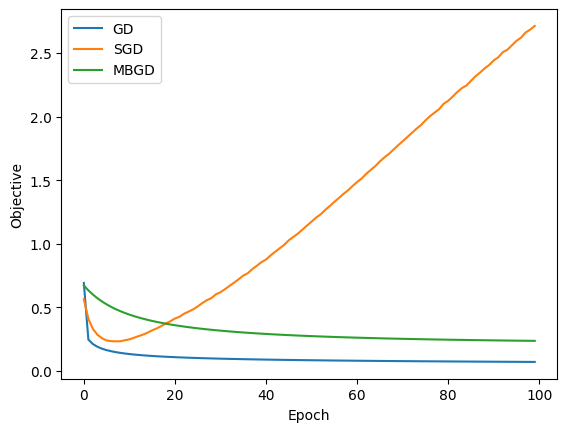

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = len(gd_objs)
x = range(epochs)

plt.plot(x, gd_objs, label="GD")
plt.plot(x, sgd_objvals, label="SGD")
plt.plot(x, mbgd_objvals, label="MBGD")

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Objective")
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [31]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
  z = X @ w # cal product
  prob = 1 / (1 + np.exp(-z)) # summation function

  f = np.where(prob >= 0, 1, -1) # setting threshold to determine class labels

  return f

In [32]:
def get_acc(w, X, y_test):
  pre = predict(w, X)
  results = (pre == y_test)
  acc = np.mean(results)
  # for i in range(len(y_test)):
  #   if results[i] == True:
  #     acc += 1
  return acc


In [51]:
# evaluate training error of logistric regression and regularized version
y_pred_train_logistic = predict(weights, x_train)
y_pred_test_logistic = predict(wei, x_test)
# gets weights for the three models and get accuracy

y_acc_test_gd = get_acc(weights, x_test, y_test)
print("Y test accuracy gd:", y_acc_test_gd)
y_acc_test_sgd = get_acc(w_w, x_test, y_test)
print("Y test accuracy sgd", y_acc_test_sgd)
y_acc_test_mbgd = get_acc(w_opt, x_test, y_test)
print("Y test accuracy mbgd", y_acc_test_mbgd)

Y test accuracy gd: 0.6228070175438597
Y test accuracy sgd 0.6228070175438597
Y test accuracy mbgd 0.6228070175438597


In [34]:
# evaluate testing error of logistric regression and regularized version
def errors(w, X, y):
  acc = get_acc(w, X, y)
  error = 1 - acc
  return error

In [35]:
y_error_test_gf_lr = errors(weights, x_train, y_train)
print("Error testing logistric regression gd:", y_error_test_gf_lr)

y_error_test_gf_lrr = errors(wei, x_test, y_test)
print("Error testing logistric regression regularized gd:", y_error_test_gf_lrr)

y_error_test_sgd_lr = errors(w_w, x_train, y_train)
print("Error testing logistric regression sgd:", y_error_test_sgd_lr)

y_error_test_sgd_lrr = errors(ww, x_test, y_test)
print("Error testing logistic regression regularized sgd:", y_error_test_sgd_lrr)

y_error_test_mbgd_lr = errors(w_opt, x_train, y_train)
print("Error testing logistric regression mbgd:", y_error_test_mbgd_lr)

y_error_test_mbgd_lrr = errors(w_optimals, x_test, y_test)
print("Error testing logistic regression regularized mbgd:", y_error_test_mbgd_lrr)

Error testing logistric regression gd: 0.37142857142857144
Error testing logistric regression regularized gd: 0.3771929824561403
Error testing logistric regression sgd: 0.37142857142857144
Error testing logistic regression regularized sgd: 0.3771929824561403
Error testing logistric regression mbgd: 0.37142857142857144
Error testing logistic regression regularized mbgd: 0.3771929824561403


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

Y test accuracy gd: 0.6228070175438597
Y test accuracy gd: 0.6228070175438597
Y test accuracy gd: 0.6228070175438597


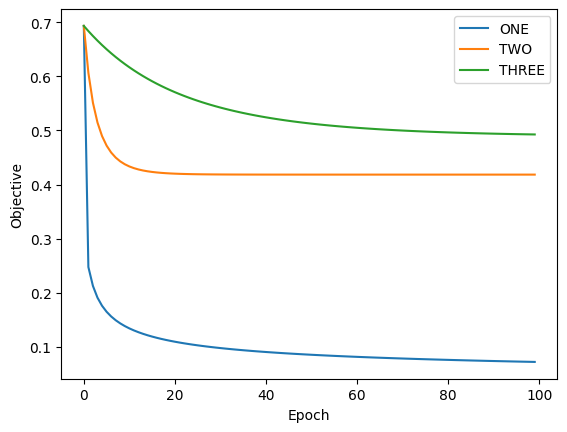

In [36]:
# testing different learning rates & their accuracy
#one
onew, gdd_o = gradient_descent(x_train,y_train, 0, 0.5, np.zeros((30, 1)))
one = get_acc(onew, x_test, y_test)
print("Y test accuracy gd:", one)

# two
oneww, gddd_o = gradient_descent(x_train,y_train, 1, 0.05, np.zeros((30, 1)))
onee = get_acc(oneww, x_test, y_test)
print("Y test accuracy gd:", onee)

# three
onewww, gdddd_o = gradient_descent(x_train,y_train, 2, 0.005, np.zeros((30, 1)))
oneee = get_acc(onewww, x_test, y_test)
print("Y test accuracy gd:", oneee)

import matplotlib.pyplot as plt
%matplotlib inline

epochs = len(gd_objs)
x = range(epochs)

plt.plot(x, gdd_o, label="ONE")
plt.plot(x, gddd_o, label="TWO")
plt.plot(x, gdddd_o, label="THREE")

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Objective")
plt.show()


From this graph I can see that with curve one having learning rate 0.5 and no regularization it converges quickly indicating a sharp decline in the objective function. The curve two with a learning rate of 0.05 and a regularization of 1 converges more slowly and ends at a higher objective values than one. The curve three with a learning rate of 0.0005 and a regularization of 2 shows that the the convergent rate is making the optimization a lot smoother.